### Create a decesion tree classifier and visualize it.
#### purpose : if we feed any new data to this classifier it would able to identify the right class.

In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [5]:
k= pd.read_csv('Iris (1).csv')
k.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
k.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
k.drop('Id',axis=1,inplace=True)      # drop the column Id
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
k.shape

(150, 5)

In [15]:
k.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
k.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


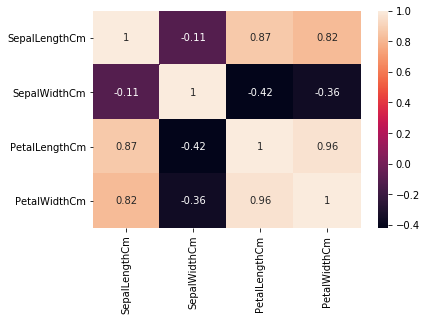

In [18]:
sns.heatmap(k.corr(),annot=True)    #### petal width and length are highly correlated.

In [31]:
x= k.iloc[:,:4].values          #### formatting the data set
y= k.iloc[:,4].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)   #### testing and traing sets.

In [34]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [40]:
model= DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)                         #define decision tree
print('Decision Tree Classifier is created')

Decision Tree Classifier is created


In [42]:
print('Traing_score',model.score(x_train,y_train))

Traing_score 1.0


[Text(418.5, 747.4499999999999, 'PetalWidthCm <= 0.8\ngini = 0.66486\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(482.8846153846154, 611.55, 'PetalWidthCm <= 1.75\ngini = 0.49627\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(257.53846153846155, 475.65, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolour'),
 Text(128.76923076923077, 339.74999999999994, 'PetalWidthCm <= 1.65\ngini = 0.05551\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolour'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolour'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(386.3076923076923, 339.74999999999994, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\ncl

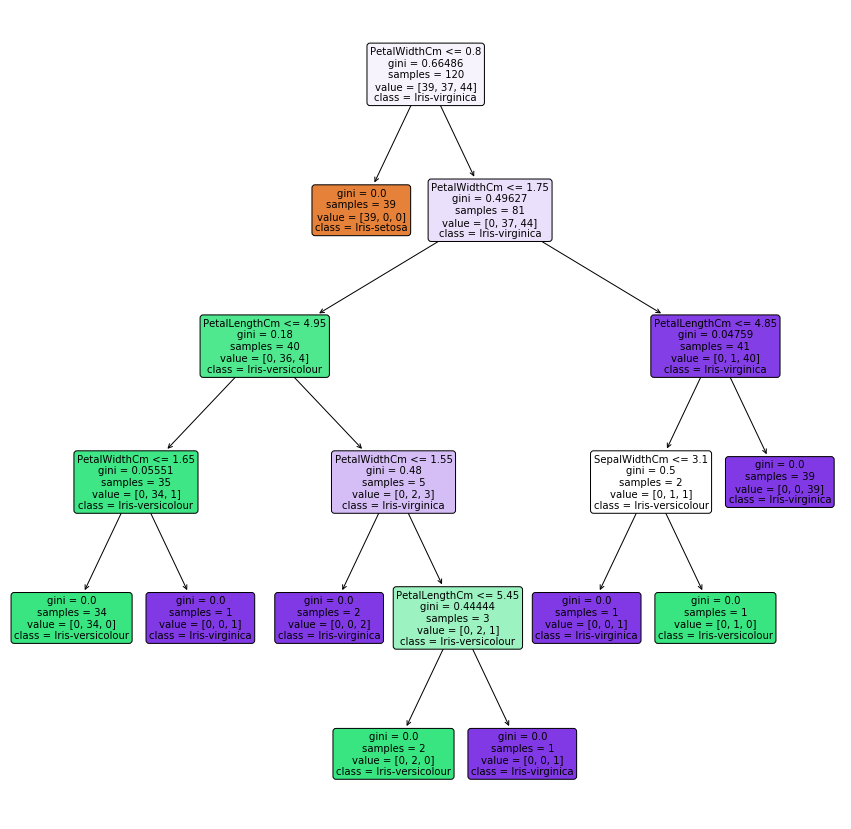

In [47]:
plt.figure(figsize=(15,15))              # visualize tree
plot_tree(model,feature_names=k.columns,class_names=['Iris-setosa','Iris-versicolour','Iris-virginica'],filled=True,precision=5,rounded=True)

In [49]:
model.predict(x_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [51]:
print('Testing Score:',model.score(x_test,y_test))    # testing the set

Testing Score: 1.0
